#  Data Preprocessing

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv(r"C:\Users\ashut\Downloads\Machine Learning\Market Pridiction\MarketPricePrediction.csv")


In [2]:
data.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,2005-01-01
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,2006-01-01
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,2011-01-01
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,2012-01-01


In [3]:
# Fill missing values or drop rows/columns with too many missing values
data = data.dropna()  


In [5]:
# Encode categorical variables
data = pd.get_dummies(data, columns=['market', 'state', 'city'], drop_first=True)


In [7]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)


# Exploratory Data Analysis (EDA)

In [ ]:
import statsmodels as sm
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(df, model = 'additive')
fig = decomposition.plot()
matplotlib.rcParams['figure.figsize'] = [9.0,5.0]

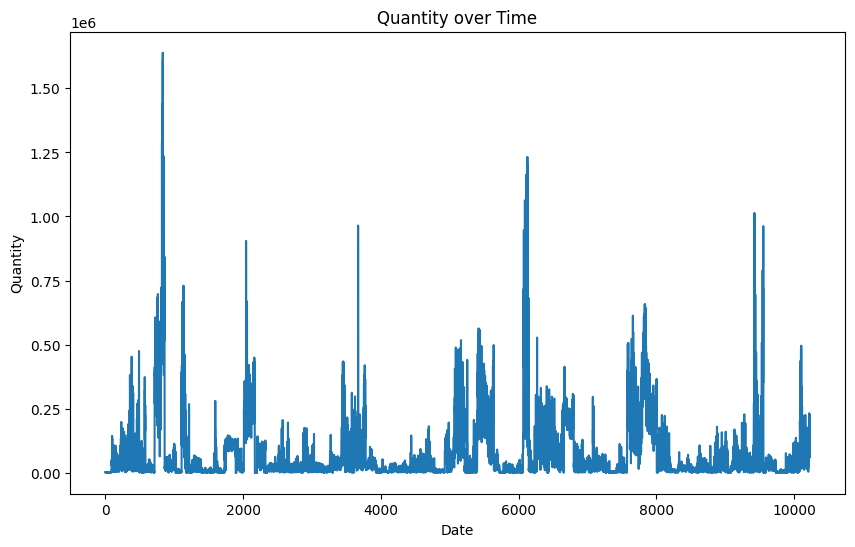

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['quantity'])
plt.title('Quantity over Time')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.show()


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['quantity'], model='additive')
decomposition.plot()
plt.show()


# Feature Engineering

In [9]:
data['quantity_lag1'] = data['quantity'].shift(1)
data['quantity_lag2'] = data['quantity'].shift(2)


In [10]:
data['quantity_roll_mean'] = data['quantity'].rolling(window=3).mean()
data['quantity_roll_std'] = data['quantity'].rolling(window=3).std()


In [12]:
data['month'] = data.index.month
data['year'] = data.index.year


# Model Selection and Training

In [14]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['quantity'], order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())


C:\Users\ashut\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ashut\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ashut\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ashut\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not mo

                               SARIMAX Results                                
Dep. Variable:               quantity   No. Observations:                10227
Model:                 ARIMA(5, 1, 0)   Log Likelihood             -127364.490
Date:                Mon, 27 May 2024   AIC                         254740.980
Time:                        11:27:44   BIC                         254784.376
Sample:                             0   HQIC                        254755.653
                              - 10227                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5108      0.003   -153.038      0.000      -0.517      -0.504
ar.L2         -0.2994      0.004    -77.486      0.000      -0.307      -0.292
ar.L3         -0.1626      0.004    -38.988      0.0

In [ ]:
from fbprophet import Prophet

data_prophet = data.reset_index().rename(columns={'date': 'ds', 'quantity': 'y'})
model = Prophet()
model.fit(df_prophet)

future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)
model.plot(forecast)
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np

# Prepare the data for LSTM
def create_lstm_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Scale and reshape the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df['quantity'].values.reshape(-1, 1))

time_step = 10
X, y = create_lstm_dataset(df_scaled, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, batch_size=1, epochs=1)


# Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_pred = model.predict(X)
y_pred = scaler.inverse_transform(y_pred)
y_true = scaler.inverse_transform(y.reshape(-1, 1))

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)


# Fine-tuning and Validation

In [13]:
# Example for ARIMA
from statsmodels.tsa.arima.model import ARIMA

best_order = None
best_rmse = float('inf')
for p in range(1, 6):
    for d in range(1, 3):
        for q in range(1, 6):
            try:
                model = ARIMA(df['quantity'], order=(p,d,q))
                model_fit = model.fit()
                y_pred = model_fit.forecast(steps=len(df))
                rmse = np.sqrt(mean_squared_error(df['quantity'], y_pred))
                if rmse < best_rmse:
                    best_rmse = rmse
                    best_order = (p, d, q)
            except:
                continue
print('Best order:', best_order)
print('Best RMSE:', best_rmse)


Best order: None
Best RMSE: inf


In [ ]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(data):
    train, test = df.iloc[train_index], df.iloc[test_index]
    # Train and evaluate the model on each fold
